# Large-scale environments for MCS/TPV cases 

In [50]:
import pansat 
from datetime import datetime
from pansat.products.reanalysis.era5 import ERA5Hourly, ERA5Monthly
import pandas as pd 
import matplotlib.pyplot as plt
import cartopy 
import numpy as np

# create product instance
domain = [10,60,50,130]
srfc_composite = ERA5Hourly('surface', ['vertical_integral_of_eastward_water_vapour_flux', 'vertical_integral_of_northward_water_vapour_flux'], domain = domain)
pressure_composite = ERA5Hourly('pressure', ['geopotential', 'u', 'v'], domain = domain)

srfc_clim = ERA5Monthly('surface', ['vertical_integral_of_eastward_water_vapour_flux', 'vertical_integral_of_northward_water_vapour_flux'], domain = domain)
pressure_clim = ERA5Monthly('pressure', ['geopotential', 'u', 'v'], domain = domain)


## Get composites 

In [22]:
times = mcs[mcs.cell == 2383].time

In [51]:
# list with datetime objects 
def get_composites(times):
    composites = []
    for i in np.arange(times.shape[0]):
        year = times.dt.year.values[i]
        month = times.dt.month.values[i]
        day = times.dt.day.values[i]
        hour = times.dt.hour.values[i]
        dt= datetime(year,month,day,hour)
        
        composites.append(dt)
    return composites 

In [52]:
composites = get_composites(times)

## Download corresponding data 

In [53]:
for t in composites[0:1]:
    srfc_composite.download(t, t)
    pressure_composite.download(t, t)
    srfc_clim.download(t, t)
    pressure_clim.download(t, t)
    

## Get variables from files 

In [81]:
## DEM
import xarray as xr
dem = '/media/juli/Data/projects/data/elevation/elevation_600x350.nc'
elevations = xr.open_dataarray(dem)
lon_elev = elevations.lon.values
lat_elev = elevations.lat.values

## AWT 
file = "ERA5/reanalysis-era5-single-levels/reanalysis-era5-single-levels_2008071909_vertical_integral_of_eastward_water_vapour_flux-vertical_integral_of_northward_water_vapour_flux10-60-50-130.nc"
dataset = xr.open_dataset(file)
awt_u= dataset['p71.162'][0]
awt_v= dataset['p72.162'][0]
lon = dataset.longitude.values
lat = dataset.latitude.values
lons,lats= np.meshgrid(lon,lat)
# calculate the absolute flux by adding u and v components
awt = np.abs(awt_u) + np.abs(awt_v)
dataset.close()


## wind and geopotential
file = "ERA5/reanalysis-era5-pressure-levels-monthly-means/reanalysis-era5-pressure-levels-monthly-means_200807_geopotential-u-v10-60-50-130.nc"
dataset = xr.open_dataset(file)
# 300 hpa 
u= dataset['u'][0][17]
# 850 hpa
v= dataset['v'][0][30]
# 500 hpa 
z= dataset['z'][0][21]


## Plot 

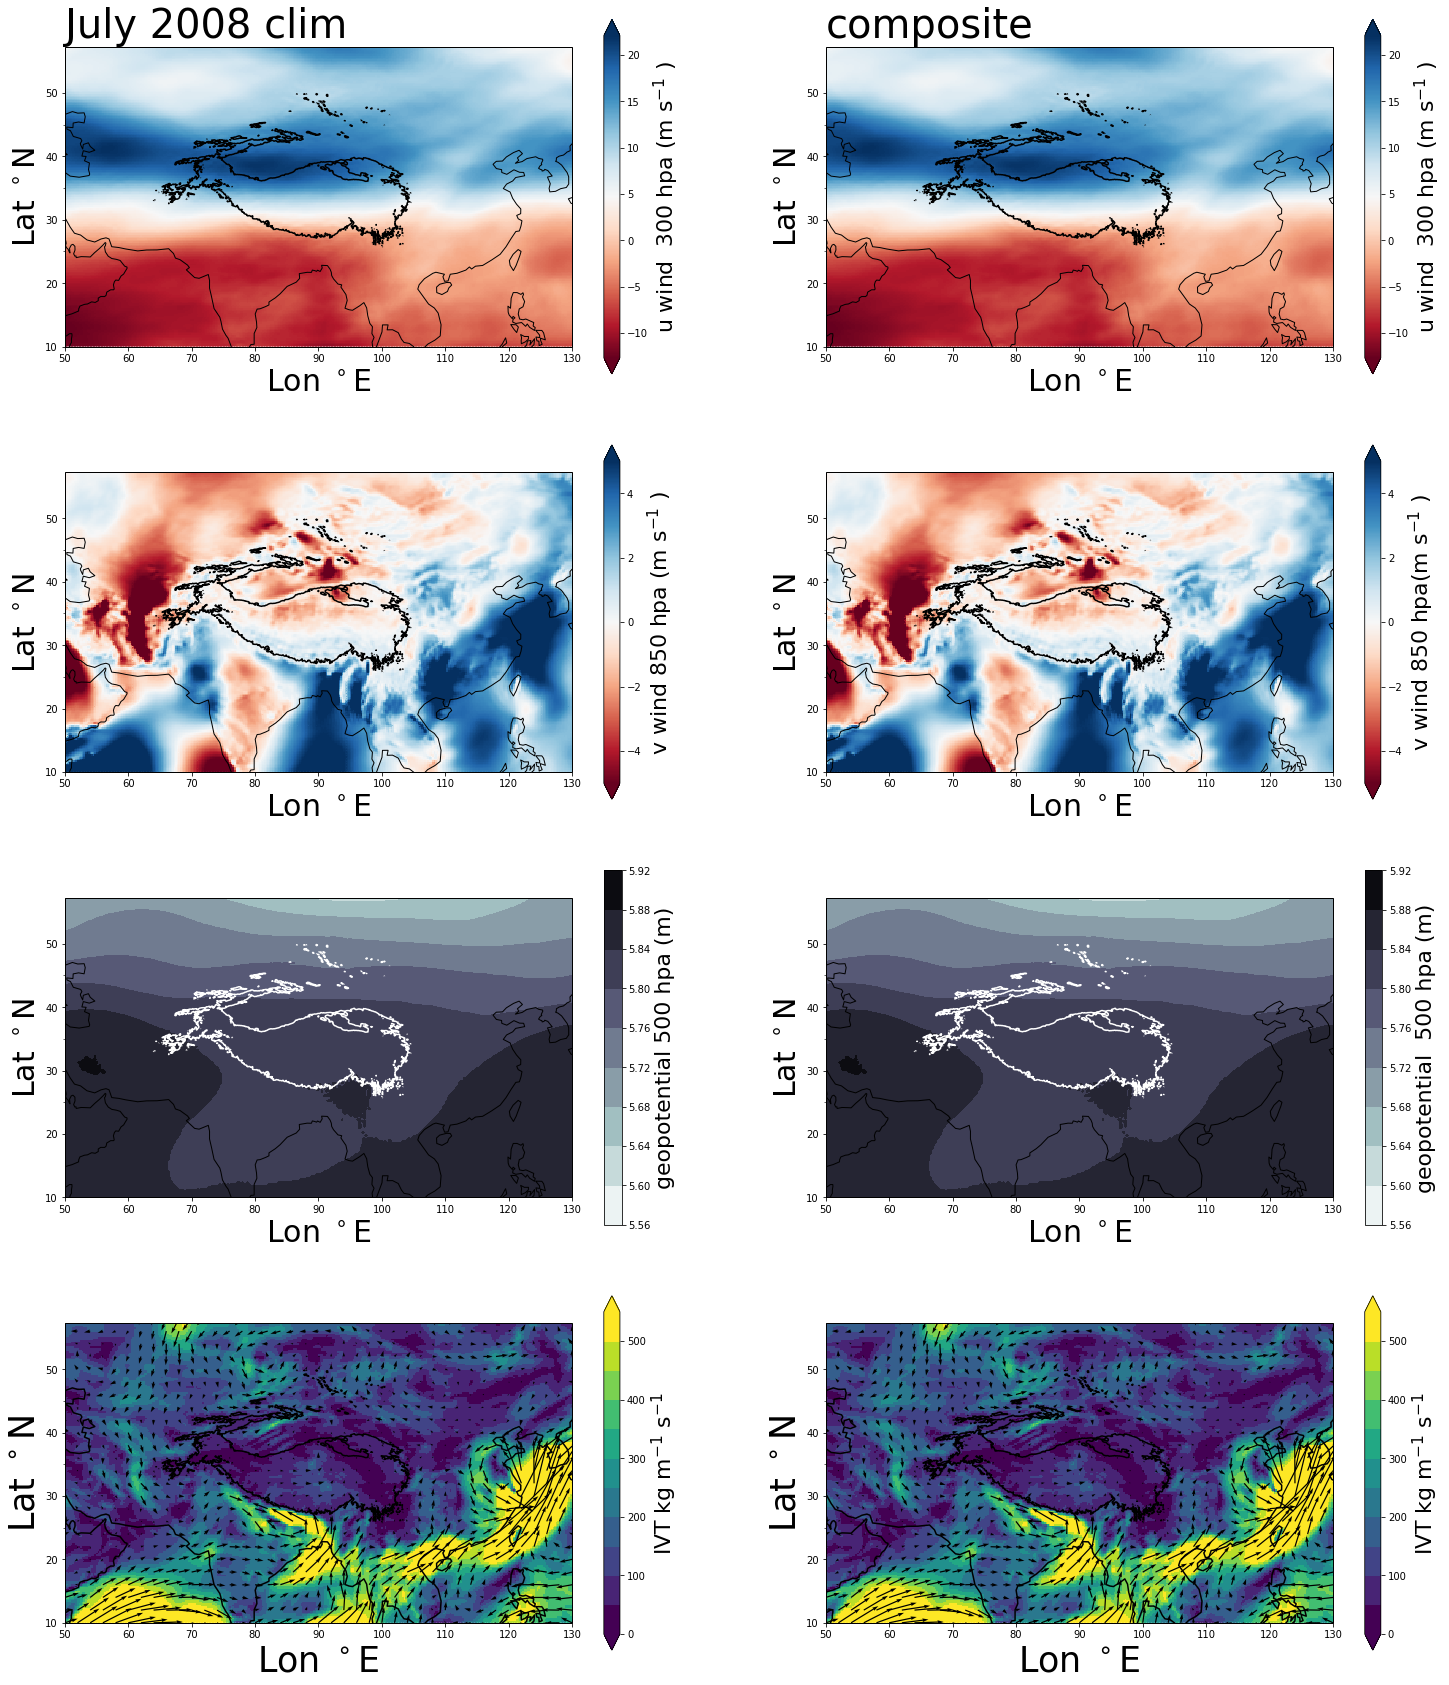

In [101]:
import quiver
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import matplotlib.colors as colors


# axes 
xlabels=[60,70,80,90,100,110, 120]
ylabels= [25, 35 ,45]
# color bar orientation 
o = 'vertical'
fs = 22

plt.figure(figsize= (25,30))
extent = [50,130,10,50]


##### u wind clim #################
ax1 = plt.subplot(4, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent(extent)
# 3000 m boundary 
ax1.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
cmap=plt.cm.RdBu
m = ax1.pcolormesh(lons, lats, u.values, cmap = cmap)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=30)
ax1.set_title('July 2008 clim', fontsize = 40, loc ='left')
ax1.coastlines()
# colorbar 
cbar= plt.colorbar(m, extend = 'both', orientation = o)
cbar.set_label('u wind  300 hpa (m s$^{-1}$ )', fontsize = fs)


##### u wind mcs #################
ax2 = plt.subplot(4, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
# 3000 m boundary 
ax2.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
m2 = ax2.pcolormesh(lons, lats, u.values, cmap = cmap)
# colorbar 
#cbar= plt.colorbar(m2, extend = 'both')
#cbar.set_label('u wind (m s$^{-1}$ )', fontsize = 30)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=30)
ax2.set_title('composite', fontsize = 40, loc ='left')
ax2.coastlines()
# colorbar 
cbar= plt.colorbar(m2, extend = 'both', orientation = o)
cbar.set_label('u wind  300 hpa (m s$^{-1}$ )', fontsize = fs)



##### v wind clim #################
ax3 = plt.subplot(4, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent(extent)
# 3000 m boundary 
ax3.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
cmap=plt.cm.RdBu
m3 = ax3.pcolormesh(lons, lats, v.values, cmap = cmap, vmin = -5, vmax = 5 )
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=30)
ax3.coastlines()
# colorbar 
cbar= plt.colorbar(m3, extend = 'both', orientation = o)
cbar.set_label('v wind 850 hpa (m s$^{-1}$ )', fontsize = fs)


##### v wind mcs #################
ax4 = plt.subplot(4, 2, 4, projection=ccrs.PlateCarree())
ax4.set_extent(extent)
# 3000 m boundary 
ax4.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
m4 = ax4.pcolormesh(lons, lats, v.values,cmap = cmap, vmin = -5, vmax = 5)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=30)
ax4.coastlines()
# colorbar 
cbar= plt.colorbar(m4, extend = 'both', orientation = o)
cbar.set_label('v wind 850 hpa(m s$^{-1}$ )', fontsize = fs)




##### geopotential clim #################
ax5 = plt.subplot(4, 2, 5, projection=ccrs.PlateCarree())
ax5.set_extent(extent)
# 3000 m boundary 
ax5.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
cmap=plt.cm.bone_r
m5 = ax5.contourf(lons, lats, z.values/9.80665/1000 , cmap = cmap)
ax5.set_xticks(xlabels, xlabels)
ax5.set_yticks(ylabels,ylabels)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax5.set_ylabel('Lat $^\circ$N',  fontsize=30)
ax5.coastlines()
# colorbar 
cbar= plt.colorbar(m5, extend = 'both', orientation = o)
cbar.set_label('geopotential 500 hpa (m)', fontsize = fs)


##### geopotential mcs #################
ax6 = plt.subplot(4, 2, 6, projection=ccrs.PlateCarree())
ax6.set_extent(extent)
# 3000 m boundary 
ax6.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys')
m6 = ax6.contourf(lons, lats, z.values/9.80665/1000 , cmap = cmap)
ax6.set_xticks(xlabels, xlabels)
ax6.set_yticks(ylabels,ylabels)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax6.set_ylabel('Lat $^\circ$N',  fontsize=30)
ax6.coastlines()
# colorbar 
cbar= plt.colorbar(m6, extend = 'both', orientation = o)
cbar.set_label('geopotential  500 hpa (m)', fontsize = fs)



## AWT 
# convert coords to 2d array 
x,y  = lons,lats
skip  =(slice(None,None,8),slice(None,None,8))
cmap=plt.cm.viridis
r = np.arange(0,600,50)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)


ax7 = plt.subplot(4, 2, 7, projection=ccrs.PlateCarree())
ax7.set_extent(extent)
ax7.coastlines(linewidth = 1.5)
ax7.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
# convert coords to 2d array 
x,y  = lons,lats
skip  =(slice(None,None,8),slice(None,None,8))
m7= ax7.pcolormesh(lons, lats, awt ,norm = norm, cmap = cmap  )    
ax7.quiver(x[skip],y[skip],awt_u[skip], awt_v[skip], transform= ccrs.PlateCarree()) 
# axis labels 
ax7.set_xticks(xlabels, xlabels)
ax7.set_yticks(ylabels,ylabels)
ax7.set_ylabel('Lat $^\circ$N',  fontsize=35)
ax7.set_xlabel('Lon $^\circ$E',  fontsize=35)
cbar= plt.colorbar(m7, extend = 'both', orientation = o)
cbar.set_label('IVT kg m$^{-1}$ s$^{-1}$', fontsize = fs)


ax8 = plt.subplot(4, 2, 8, projection=ccrs.PlateCarree())
ax8.set_extent(extent)
ax8.coastlines(linewidth = 1.5)
ax8.contour(elevations.lon.values,elevations.lat.values, elevations.data.T, [3000], cmap = 'Greys_r')
# convert coords to 2d array 
x,y  = lons,lats
skip  =(slice(None,None,8),slice(None,None,8))
m8= ax8.pcolormesh(lons, lats, awt ,norm = norm, cmap = cmap  )    
ax8.quiver(x[skip],y[skip],awt_u[skip], awt_v[skip], transform= ccrs.PlateCarree()) 
# axis labels 
ax8.set_xticks(xlabels, xlabels)
ax8.set_yticks(ylabels,ylabels)
ax8.set_ylabel('Lat $^\circ$N',  fontsize=35)
ax8.set_xlabel('Lon $^\circ$E',  fontsize=35)
cbar= plt.colorbar(m8, extend = 'both', orientation = o)
cbar.set_label('IVT kg m$^{-1}$ s$^{-1}$', fontsize = fs)


plt.savefig('plots/synoptic_environments.png')
plt.show()